<a href="https://colab.research.google.com/github/AtulAravindDas/MYMLDLDAPROJECTS/blob/main/SpamDetection80_20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Email Detection**

Detect whether an email is spam or not

## **Import the Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Import the Dataset**

In [2]:
spam_dataset=pd.read_csv('/content/drive/MyDrive/Datasets/emails.csv')
spam_dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
spam_dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_dataset.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [5]:
spam_dataset.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
spam_dataset.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [7]:
spam_dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
spam_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## **Visualize the Dataset**

In [9]:
ham=spam_dataset[spam_dataset.spam==0]
spam=spam_dataset[spam_dataset.spam==1]

In [10]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [11]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [12]:
print("Spam Percentage:",len(spam)*100/len(spam_dataset))

Spam Percentage: 23.88268156424581


In [13]:
print("Ham Percentage:",len(ham)*100/len(spam_dataset))

Ham Percentage: 76.11731843575419


### **Count the number of Spam mails vs Number of Ham mails**

<ipython-input-14-58d3017d11e4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(spam_dataset,x='spam',label='Count spam vs ham',palette='viridis')


<Axes: xlabel='spam', ylabel='count'>

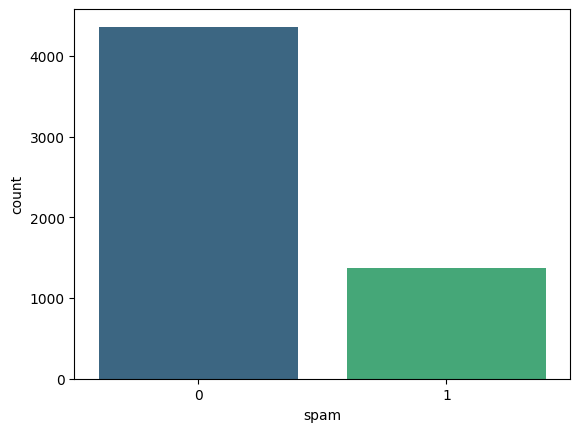

In [14]:
sns.countplot(spam_dataset,x='spam',label='Count spam vs ham',palette='viridis')

## **Count Vectorizer Example**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
sample_data=['This is first document','This is second document','And this document is third document','Is this first document']

In [17]:
sample_vectorizer=CountVectorizer()

In [18]:
X=sample_vectorizer.fit_transform(sample_data) #Describes all the information

In [19]:
vocabulary=sample_vectorizer.get_feature_names_out()

In [20]:
vocabulary

array(['and', 'document', 'first', 'is', 'second', 'third', 'this'],
      dtype=object)

In [21]:
X

<4x7 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [22]:
print(X.toarray()) #Converts it to array for viewing purposes

[[0 1 1 1 0 0 1]
 [0 1 0 1 1 0 1]
 [1 2 0 1 0 1 1]
 [0 1 1 1 0 0 1]]


## **Implement CountVectorizer on the Text classified as Spam**

This will be used as inputs for the Naive Bayes classifier

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
spam_dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [25]:
spam_ham_sample_text_data=spam_dataset['text']
spam_ham_sample_text_data

,text
0,Subject: naturally irresistible your corporate...
1,Subject: the stock trading gunslinger fanny i...
2,Subject: unbelievable new homes made easy im ...
3,Subject: 4 color printing special request add...
4,"Subject: do not have money , get software cds ..."
...,...
5723,Subject: re : research and development charges...
5724,"Subject: re : receipts from visit jim , than..."
5725,Subject: re : enron case study update wow ! a...
5726,"Subject: re : interest david , please , call..."


In [26]:
spamham_count_vectorizer=CountVectorizer()
X=spamham_count_vectorizer.fit_transform(spam_ham_sample_text_data)

In [27]:
vocabulary=spamham_count_vectorizer.get_feature_names_out()
vocabulary

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [28]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
X.shape

(5728, 37303)

## **Model Training and Prediction**


In [30]:
label=spam_dataset['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0])

In [31]:

from sklearn.naive_bayes import MultinomialNB

Spam_NaiveBayes=MultinomialNB() #Instantiates an object of MultinomialNB

Spam_NaiveBayes.fit(X,label)

MultinomialNB()

In [32]:
testing_sample=['Free Money!!!!','Hi Professor Wildman, Please let me know if there is any opening for Teaching assistant roles in the department','Hi Joe, I need the project reports on my table by Monday evening!!!']
testing_sample_countvectorizer=spamham_count_vectorizer.transform(testing_sample)

In [33]:
predictions=Spam_NaiveBayes.predict(testing_sample_countvectorizer)
predictions

array([1, 0, 0])

In [34]:
testing_sample2=['Hi, my name is Atul Aravind Das and I am coming to Zurich on Friday. I want to stay in the Luxury suite of your hotel for the entire duration of my trip, that is till next Thursday','Free Medicine to satisfy your partner while fornicating with her','Hi Bryan, congratulations you have been accepted into the MSDS program of Boston University']
testing_sample2_countvectorizer=spamham_count_vectorizer.transform(testing_sample2)
vocabulary=spamham_count_vectorizer.get_feature_names_out()
vocabulary

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [35]:
predictions2=Spam_NaiveBayes.predict(testing_sample2_countvectorizer)
predictions2

array([0, 1, 0])

## **Model Training and Prediction after division of data into training and testing**

In [36]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
y=label
label

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
y.shape

(5728,)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [40]:
from sklearn.naive_bayes import MultinomialNB

Spam_NaiveBayes=MultinomialNB() #Instantiates an object of MultinomialNB

Spam_NaiveBayes.fit(X_train,y_train)

MultinomialNB()

In [46]:
y_pred_train=Spam_NaiveBayes.predict(X_train)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3466
           1       0.99      1.00      0.99      1116

    accuracy                           1.00      4582
   macro avg       0.99      1.00      0.99      4582
weighted avg       1.00      1.00      1.00      4582



<Axes: >

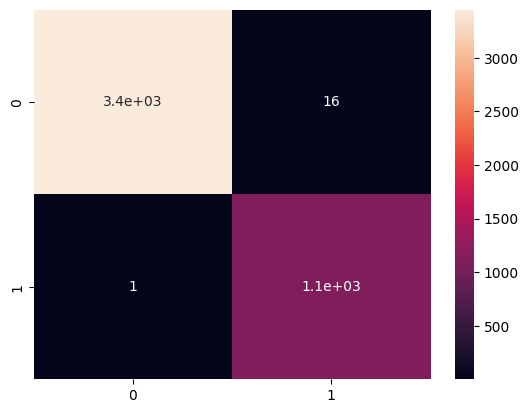

In [48]:
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm,annot=True)

In [49]:
print(accuracy_score(y_train,y_pred_train))

0.99628982976866


### **Checking the final results on the test data**

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y_pred=Spam_NaiveBayes.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       894
           1       0.97      1.00      0.98       252

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



<Axes: >

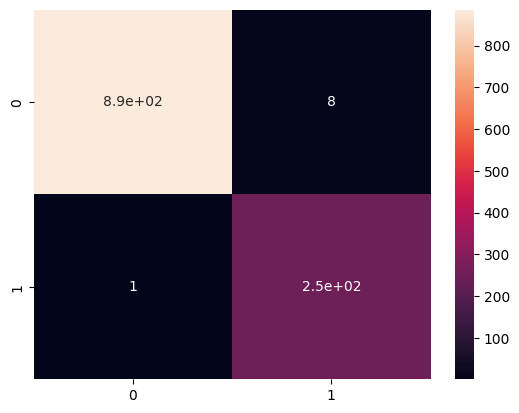

In [45]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [50]:
print(accuracy_score(y_test,y_pred))

0.9921465968586387


## **Test the model with random Data**

In [55]:
print(Spam_NaiveBayes.predict(spamham_count_vectorizer.transform(['YOU HAVE WON A FREE IPAD',"No problem! Here’s the information about the Mercedes CLR GTR:The Mercedes CLR GTR is a remarkable racing car celebrated for its outstanding performance and sleek design. Powered by a potent 6.0-liter V12 engine, it delivers over 600 horsepower. Acceleration from 0 to 100 km/h takes approximately 3.7 seconds, with a remarkable top speed surprising 320 km/h.Incorporating adventure aerodynamic features and cutting-edge stability technologies, the CLR GTR ensures exceptional stability and control, particularly during high-speed maneuvers.Originally priced at around $1.5 million, the Mercedes CLR GTR is considered one of the most exclusive and prestigious racing cars ever produced. Its limited production run of just five units adds to its rarity, making it highly sought after by racing enthusiasts and collectors worldwide."])))

[1 1]


In [56]:
test_data=['Crazy rich single women in your area!!!! Come here for an experience of a lifetime']
test_data=spamham_count_vectorizer.transform(test_data)
print(Spam_NaiveBayes.predict(test_data))

[1]


In [57]:
test_data2=['Hi, my name is Atul and I would like to make a booking for Friday morning']
test_data2=spamham_count_vectorizer.transform(test_data2)
print(Spam_NaiveBayes.predict(test_data2))

[0]
